In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from env.motion_dataset import MotionDataset

In [2]:
def quat_to_rotmat(q):
    """Convert quaternion [w, x, y, z] to a 3x3 rotation matrix."""
    w, x, y, z = q
    # normalize to be safe
    norm = np.linalg.norm(q)
    if norm == 0:
        raise ValueError("Zero-length quaternion")
    w, x, y, z = q / norm

    xx, yy, zz = x*x, y*y, z*z
    xy, xz, yz = x*y, x*z, y*z
    wx, wy, wz = w*x, w*y, w*z

    R = np.array([
        [1 - 2*(yy + zz),     2*(xy - wz),         2*(xz + wy)],
        [2*(xy + wz),         1 - 2*(xx + zz),     2*(yz - wx)],
        [2*(xz - wy),         2*(yz + wx),         1 - 2*(xx + yy)]
    ])
    return R

def plot_pose(root_pos, root_quat, axis_len=0.2):
    """
    Plot a pose given position and quaternion.
    root_pos: (3,) array-like
    root_quat: (4,) array-like, [x, y, z, w]
    """

    R = quat_to_rotmat(root_quat)

    # Axes in world coordinates
    x_axis = root_pos + R[:, 0] * axis_len
    y_axis = root_pos + R[:, 1] * axis_len
    z_axis = root_pos + R[:, 2] * axis_len

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot origin
    ax.scatter(root_pos[0], root_pos[1], root_pos[2])

    # Plot axes (X, Y, Z)
    ax.plot([root_pos[0], x_axis[0]], [root_pos[1], x_axis[1]], [root_pos[2], x_axis[2]], label='x')
    ax.plot([root_pos[0], y_axis[0]], [root_pos[1], y_axis[1]], [root_pos[2], y_axis[2]], label='y')
    ax.plot([root_pos[0], z_axis[0]], [root_pos[1], z_axis[1]], [root_pos[2], z_axis[2]], label='z')

    # Make it look nice
    max_range = axis_len * 2.0
    for i in range(3):
        center = root_pos[i]
        getattr(ax, f'set_{["x","y","z"][i]}lim')(center - max_range, center + max_range)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_box_aspect([1, 1, 1])

    plt.show()

In [3]:
motion_data = MotionDataset("env/motion_data/walk.npz")

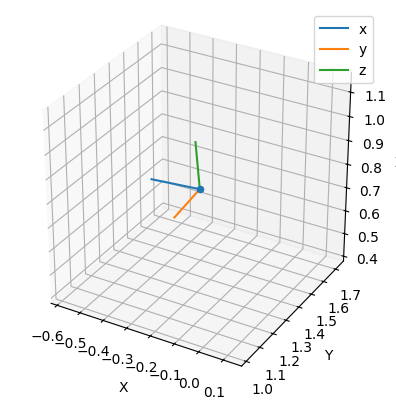

In [4]:
sample = motion_data.sample(1)
root_pos = sample['root_pos'][0].numpy()
root_rot = sample['root_rot'][0].numpy()  # Quaternion [x, y

plot_pose(root_pos, root_rot)

In [8]:
current_times = motion_data.sample_times(10)

In [9]:
times = (
            np.expand_dims(current_times, axis=-1)
            - motion_data.dt * np.arange(0, 2)
        ).flatten()

In [11]:
samples = motion_data.sample(20, times=times)

In [ ]:
root = samples["root_pos"]

torch.Size([20, 3])